In [1]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from persim import PersImage
import gudhi
import os
import glob
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn import preprocessing

In [1333]:
flist=np.sort(glob.glob("*3d_Z2_Ising*/2.8/*.txt"))

In [1334]:
for f in flist[50:100]:
    t0 = time.time()
    data = np.loadtxt(f, dtype=int)
    alpha_complex=gudhi.AlphaComplex(data)
    simplex_tree=alpha_complex.create_simplex_tree()
    PD=simplex_tree.persistence()
    PD0=[]
    PD1=[]
    PD2=[]
    for elm in PD:
        if elm[0]==1:
            PD1.append((elm[1][0],elm[1][1]-elm[1][0]))
        elif elm[0]==2:
            PD2.append((elm[1][0],elm[1][1]-elm[1][0]))
        else:
            if elm[1][1]!=float('inf'):
                PD0.append((elm[1][0],elm[1][1]-elm[1][0]))
    PD0=np.round(PD0,decimals=5)
    PD1=np.round(PD1,decimals=5)
    PD2=np.round(PD2,decimals=5)
    loc,counts=np.unique(PD0,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD0.dat",toSave)
    loc,counts=np.unique(PD1,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD1.dat",toSave)
    loc,counts=np.unique(PD2,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD2.dat",toSave)
    print(f, time.time() - t0)

Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553282770.txt 6.860645532608032
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553282781.txt 6.43657112121582
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553282798.txt 6.4308812618255615
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553282816.txt 6.3092968463897705
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553282931.txt 6.391962766647339
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553282976.txt 6.4933929443359375
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283042.txt 6.3823254108428955
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283099.txt 6.805423021316528
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283113.txt 7.088414192199707
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283162.txt 7.290533781051636
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283263.txt 7.694088697433472
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283285.txt 7.915292263031006
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283286.txt 7.126030683517456
Data_3d_Z2_Ising_Met_N=15_K=200\2.8\1553283352.txt 6.982148885726929
Data_3d_Z2_Ising_Met_N=15_K=200

In [1335]:
fPD1list=np.sort(glob.glob("*3d_Z2_Ising*/*/*PD1.dat"))
TPD1list=[]
for f in fPD1list:
    TPD1list.append(float(f[32:35]))
np.array(np.unique(TPD1list, return_counts=True)).T

array([[  0.1, 100. ],
       [  0.2, 100. ],
       [  0.3, 100. ],
       [  0.4, 100. ],
       [  0.5, 100. ],
       [  0.6, 100. ],
       [  0.7, 100. ],
       [  0.8, 100. ],
       [  0.9, 100. ],
       [  1. , 100. ],
       [  1.1, 100. ],
       [  1.2, 100. ],
       [  1.3, 100. ],
       [  1.4, 100. ],
       [  1.5, 100. ],
       [  1.6, 100. ],
       [  1.7, 100. ],
       [  1.8, 100. ],
       [  1.9, 100. ],
       [  2. , 100. ],
       [  2.1, 100. ],
       [  2.2, 100. ],
       [  2.3, 100. ],
       [  2.4, 100. ],
       [  2.5, 100. ],
       [  2.6, 100. ],
       [  2.7, 100. ],
       [  2.8, 100. ],
       [  2.9, 100. ],
       [  3. , 100. ],
       [  3.1, 100. ],
       [  3.2, 100. ],
       [  3.3, 100. ],
       [  3.4, 100. ],
       [  3.5, 100. ],
       [  3.6, 100. ],
       [  3.7, 100. ],
       [  3.8, 100. ],
       [  3.9, 100. ],
       [  4. , 100. ]])

In [1336]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [bmin,bmax,pmin,pmax]
#bins should be a list [bbins, pbins]
def PerIm(pdloc,bounds,bins,stdev,res=1000):
    x = np.linspace(bounds[0], bounds[1], res)
    y = np.linspace(bounds[2], bounds[3], res)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z=np.zeros([res,res])
    for i in np.arange(len(pdloc)):
        z=z+pdloc[i][1]*pdloc[i][2]*np.exp((-0.5*(xx-pdloc[i][0])**2-0.5*(yy-pdloc[i][1])**2)*stdev**-2)
    return z.reshape(bins[0],res//bins[0],bins[1],res//bins[1]).sum(3).sum(1)

In [1389]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [pmin,pmax]
#bins should be pbins
def PerIm0(pdlocnum,bounds,bins,stdev,res=1000):
    if len(np.shape(pdlocnum))==1:
        pdlocnum = np.array([pdlocnum])
    
    y = np.linspace(bounds[0], bounds[1], res)
    z=np.zeros(res)
    for i in np.arange(len(pdlocnum)):
        z=z+np.log(1+pdlocnum[i][1])*pdlocnum[i][2]*np.exp((-0.5*(y-pdlocnum[i][1])**2)*stdev**-2)
    return z.reshape(bins,res//bins).sum(1)

In [1337]:
fPD0list=np.sort(glob.glob("*3d_Z2_Ising*/*/*PD0.dat"))
TPD0list=[]
for f in fPD0list:
    TPD0list.append(float(f[32:35]))

fPD1list=np.sort(glob.glob("*3d_Z2_Ising*/*/*PD1.dat"))
TPD1list=[]
for f in fPD1list:
    TPD1list.append(float(f[32:35]))

fPD2list=np.sort(glob.glob("*3d_Z2_Ising*/*/*PD2.dat"))
TPD2list=[]
for f in fPD2list:
    TPD2list.append(float(f[32:35]))

In [1390]:
pds0=[np.loadtxt(f) for f in fPD0list]
pds1=[np.loadtxt(f) for f in fPD1list]
pds2=[np.loadtxt(f) for f in fPD2list]

In [1504]:
bounds=[0,5]
bins=10
res=bins*10

imgs0 = [PerIm0(p,bounds,bins,1,res=res) for p in pds0]

In [1505]:
bounds=[0,5,0,5]
bins=[10,10]
res=bins[0]*10

imgs1=[PerIm(pd,bounds,bins,1,res=res) for pd in pds1]
imgs2=[PerIm(pd,bounds,bins,1,res=res) for pd in pds2]

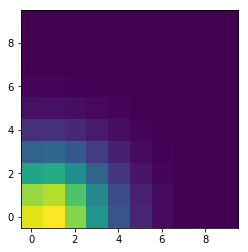

In [1396]:
plt.imshow(imgs2[0],origin='lower')

In [1519]:
imgs0_array=np.array(imgs0)
imgs1_array=np.array([img.flatten() for img in imgs1])
imgs2_array=np.array([img.flatten() for img in imgs2])
imgs12_array=np.array([np.append(imgs1_array[i],imgs2_array[i]).flatten() for i in range(len(imgs1_array))])
imgs012_array=np.array([np.append(imgs0_array[i],imgs12_array[i]).flatten() for i in range(len(imgs0_array))])

In [1766]:
labels1=[int(t<1.31337) for t in TPD1list]
labels2=[int(t<1.81337) for t in TPD2list]

In [1767]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(imgs012_array, labels2, TPD2list, test_size=0.5)

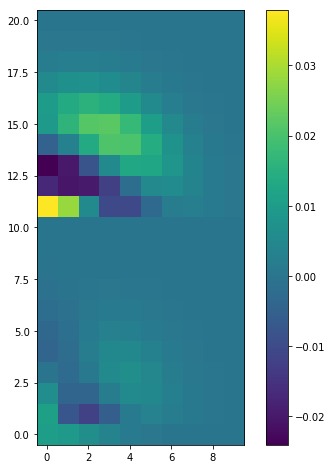

In [1772]:
logreg = LogisticRegression(C=0.1, solver='liblinear', penalty='l2')
logreg.fit(X_train, y_train)

inverse_image = np.copy(logreg.coef_).reshape((21,10))
fig, ax = plt.subplots(figsize=(8,8))
cs = ax.imshow(inverse_image, origin='lower')
cbar = fig.colorbar(cs)

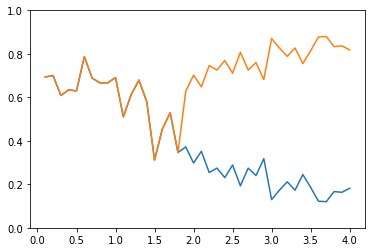

0.130582793637517

In [1773]:
pred = logreg.predict(X_test)
diff = abs(pred-y_test)
TT = np.arange(0.1,4.05,0.1)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

plt.ylim((0,1))
plt.plot(TT, avg)
plt.plot(TT, acc)
plt.show()
np.std(acc)

**PCA**

In [1790]:
subset=[np.array([imgs2_array[i,:2],imgs2_array[i,20:22]]).flatten() for i in range(len(imgs2_array))]
np.shape(subset)

(4000, 4)

In [1813]:
lowT=imgs2_array[np.where(TPD2list==np.min(TPD2list))[0]]
highT=imgs2_array[np.where(TPD2list==np.max(TPD2list))[0]]
subset=np.append(lowT,highT,axis=0)
subsetT=np.append([TPD2list[i] for i in np.where(TPD2list==np.min(TPD2list))[0]],[TPD2list[i] for i in np.where(TPD2list==np.max(TPD2list))[0]])

In [1817]:
pca = PCA(n_components=2)
X_r = pca.fit(imgs2_array).transform(imgs2_array)
# X_r = pca.fit(subset).transform(subset)
np.shape(X_r)

(4000, 2)

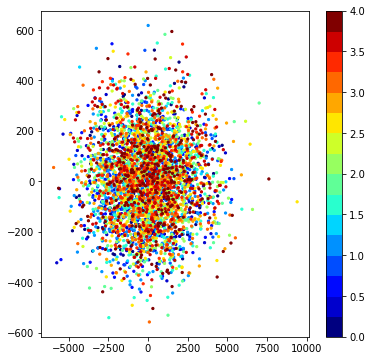

In [1819]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(0,40)
fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,4,17)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = ax.scatter([elm[0] for elm in X_r],[elm[1] for elm in X_r],c=TPD2list,s=5,cmap=cmap, norm=norm)
cbar = fig.colorbar(scat)
plt.show()

In [1816]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(subset, labels2, subsetT, test_size=0.5)

ValueError: Found input variables with inconsistent numbers of samples: [200, 4000, 200]

In [1796]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=100, max_iter=100000, tol=1e-6).fit(X_train)

1.9012024048096192


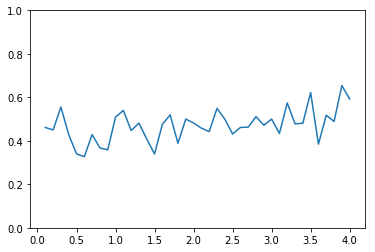

In [1797]:
pred = kmeans.predict(X_test)
diff = abs(pred - y_test)
TT = np.unique(T_test)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

plt.plot(TT, avg)
plt.ylim((0,1))

tRange = np.linspace(1.6,2.5,500)
interp = np.interp(tRange, TT, avg)

Tc = tRange[abs(interp-0.5).argmin()]
print(Tc)